### **Libraries**

In [38]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

First, we should call some variables from data cleaning process.

In [ ]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

%store -r cat_columns
cat_columns = cat_columns   

### **Descriptive Analysis**

##### **Numerical Data**

Now, let’s analyze the descriptive statistics for quantitative variables. In this section, we will find measurements of central tendency, dispersion, and shape. Then, we will draw the distribution plot to compare it with the normal distribution.

In [27]:
def kde_plot(x):
    plt.figure(figsize = (12,3))

    sns.distplot(df[x[0]], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})
    sns.despine(left = True)

    mean = df[x[0]].mean()
    median = df[x[0]].median()

    plt.axvline(mean, color ='black', linestyle ='dashed')
    plt.axvline(median, color ='green', linestyle ='solid')
    plt.xlabel('')
    plt.ylabel('')

    return plt.show()

Now we can see the statistical interpretation for quantitative variables:

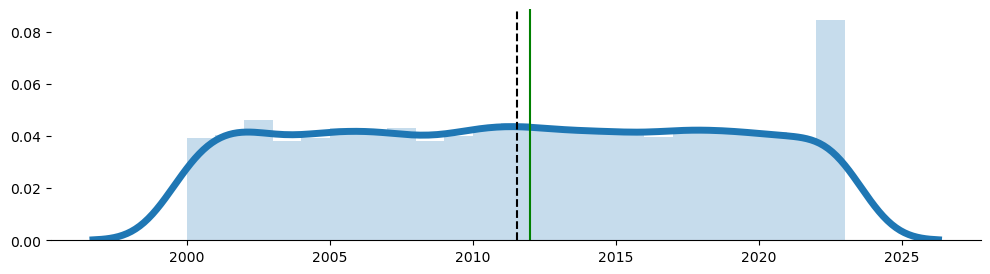

In [28]:
kde_plot([numeric_columns[0]]) #Year

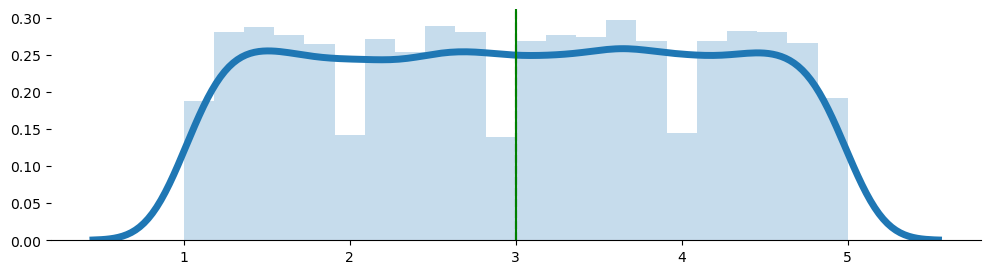

In [29]:
kde_plot([numeric_columns[1]]) #EngineSize

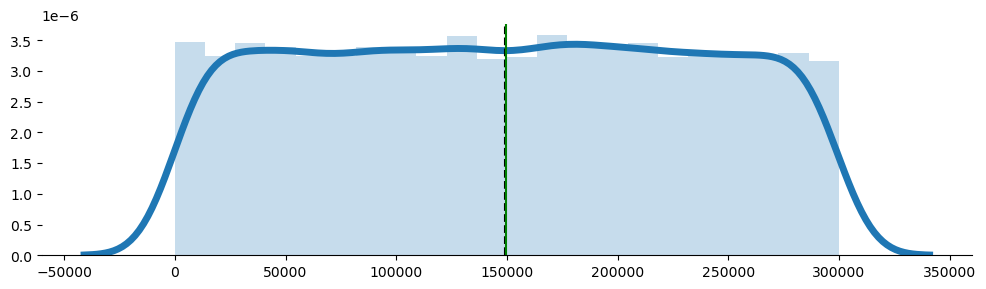

In [30]:
kde_plot([numeric_columns[2]]) #Mileage

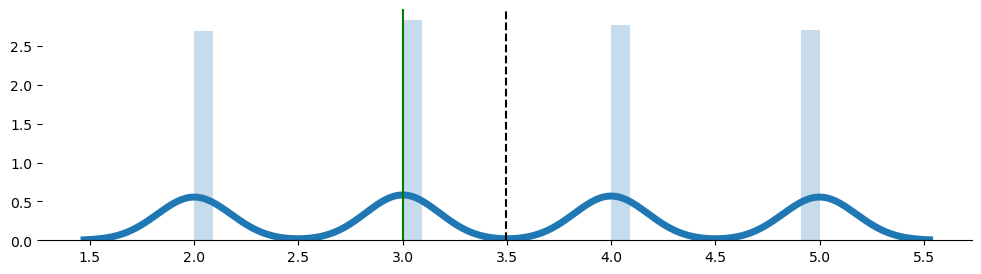

In [31]:
kde_plot([numeric_columns[3]]) #Doors

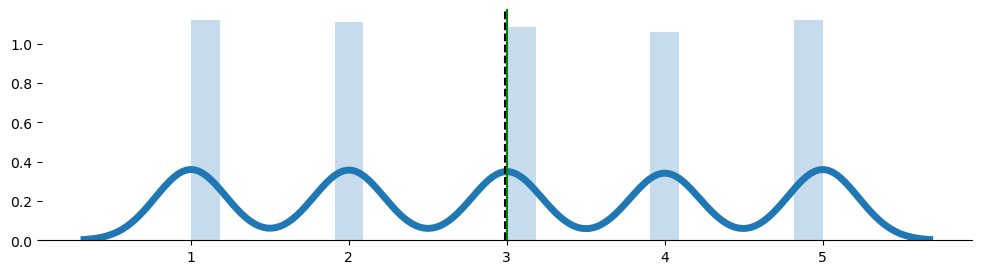

In [32]:
kde_plot([numeric_columns[4]]) #Owners

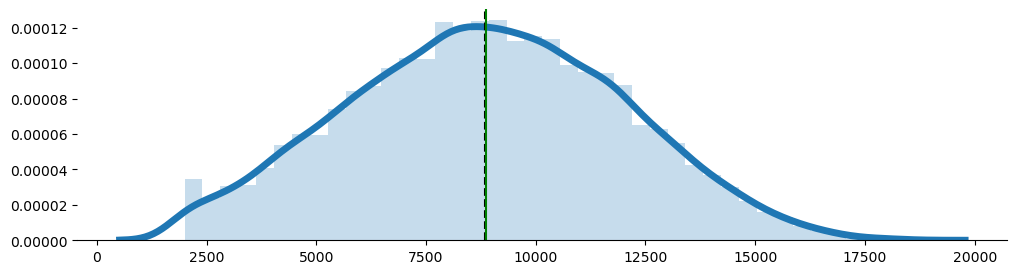

In [33]:
kde_plot([numeric_columns[5]]) #Price

None of the above column does not need any transformation in later.

##### **Categorical Data**

Here, we can find the mode of categorical columns to see which category repeated more than rest.

In [35]:
print(cat_columns[0], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[1], '->' , df[cat_columns[1]].mode()[0])
print(cat_columns[2], '->' , df[cat_columns[2]].mode()[0])
print(cat_columns[3], '->' , df[cat_columns[3]].mode()[0])

Brand -> Ford
Model -> Accord
Fuel -> Electric
Transmission -> Manual


### **Correlation Analysis**

In this section, I will explore the relationship between various factors and price. Since price is a crucial aspect for each car, it is important to examine how other variables may be correlated with it. To accomplish this, we will consider two different approaches. The first approach involves analyzing the correlation between numeric variables and price using `Pearson correlation`. The second approach will assess the correlation between categorical variables and price using the `ANOVA test`.

##### **Numerical Data (Pearson)**

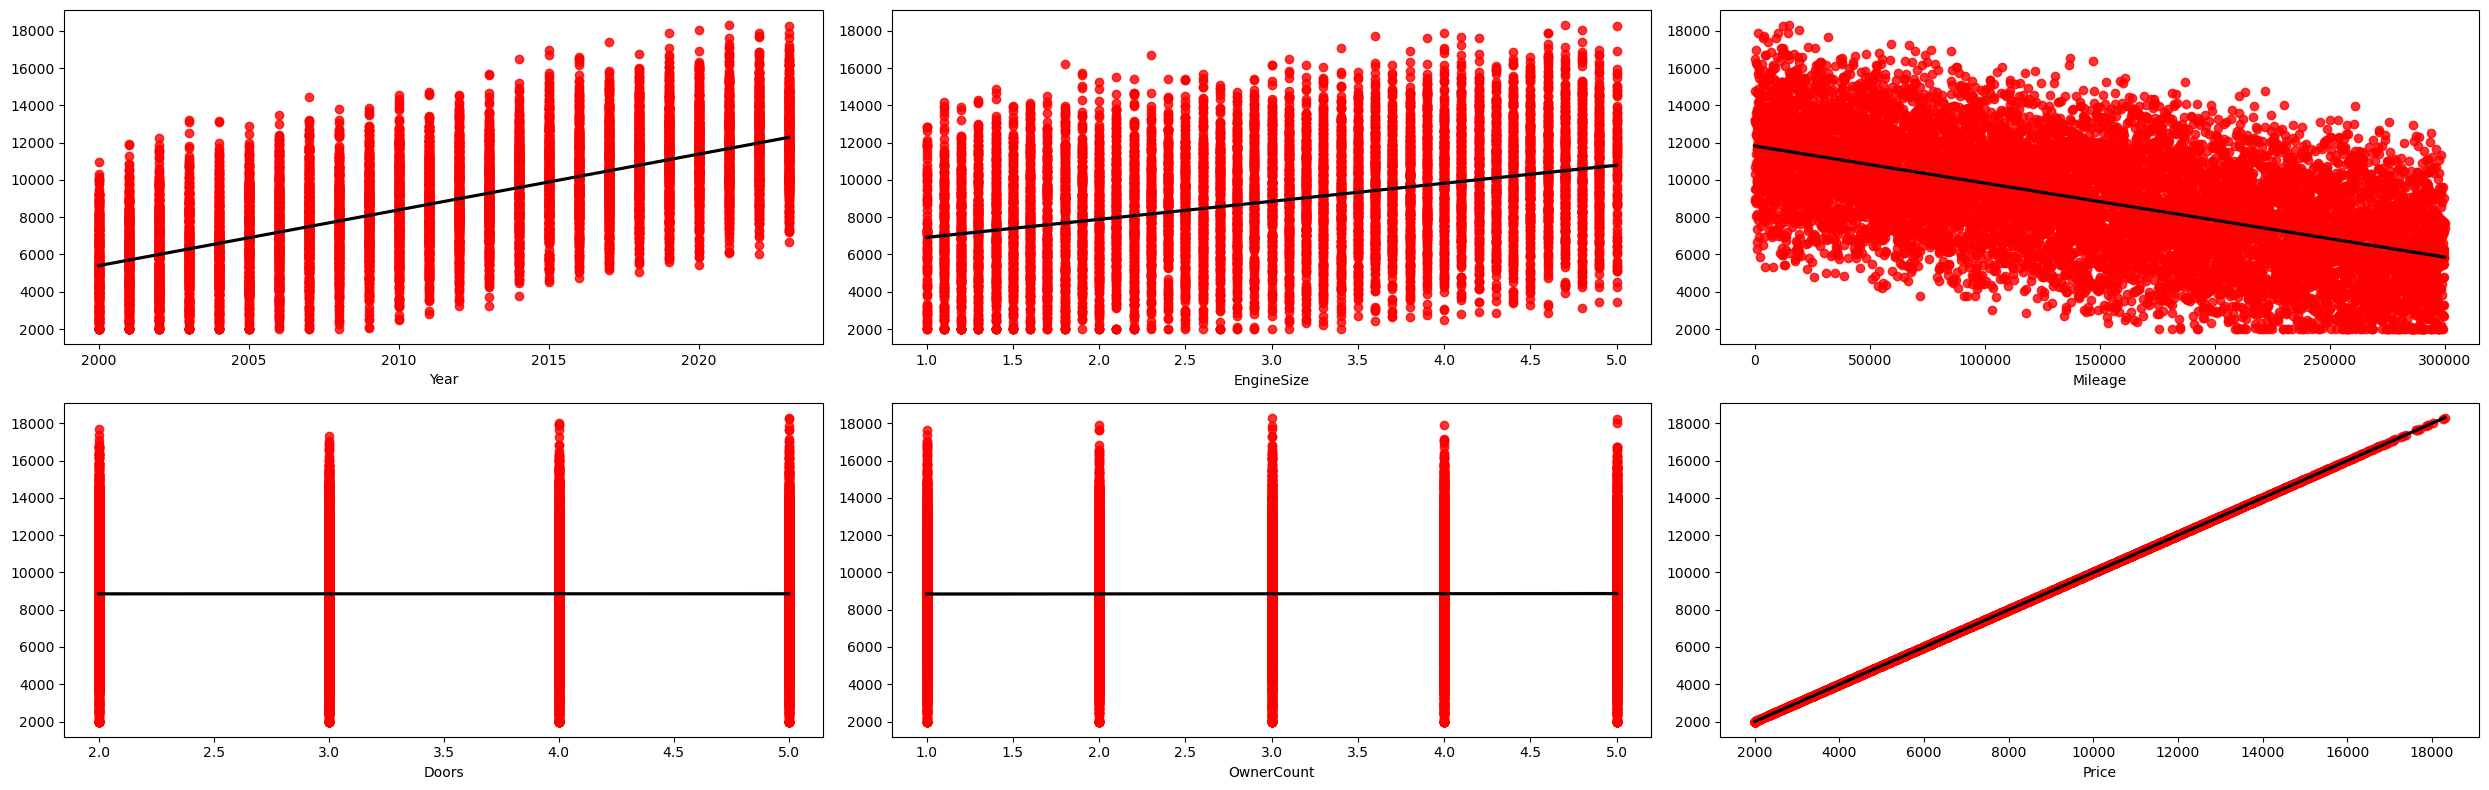

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col, 
                y='Price', 
                data=df, 
                ax=axes[i], 
                scatter_kws={"color": "red"}, 
                line_kws={"color":"black"})
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

* Newer models have higher price and they have `positive` relationship.
* The cars with bigger Engine Size have higher price and they have `positive` relationship.
* The cars with more Mileage have lower price and they have `negative` relationship.

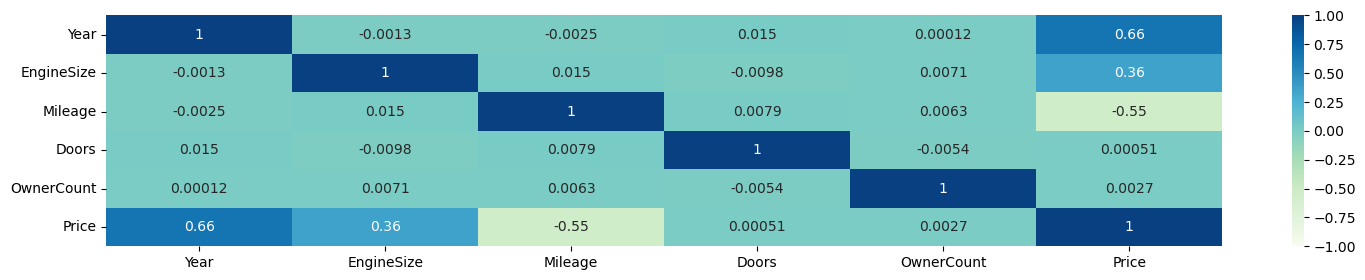

In [ ]:
pearson_cor = df[numeric_columns].corr(method = 'pearson')
plt.figure(figsize = (18,3))

sns.heatmap(pearson_cor,
            vmin = -1,
            vmax = 1,
            cmap = "GnBu",
            annot = True)
plt.show()

##### **Categorical Data (ANOVA)**

For categorical variables, the first step is to determine whether a specific categorical variable has an impact on price, meaning we need to assess its significance. To do this, we conduct an ANOVA test to compare the differences between means. After identifying the significant variables, we perform pairwise descriptive analysis for all categories within the relevant categorical variable, allowing us to compare their effects on price.

In [39]:
for i in cat_columns:
    formula = 'Price ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]

    print('P-value for Price ~ {}: {}'.format(i , p_value))

P-value for Price ~ Brand: 0.19027637004777526
P-value for Price ~ Model: 0.8177865225247964
P-value for Price ~ Fuel: 8.528045214106001e-154
P-value for Price ~ Transmission: 3.049452682074096e-136


According to results, we can come up that:
* `Fuel` and `Transmission` are significant to explain the price of car, because the p-value is less than 0.05 and we reject null hypothesis.
* However, `Brand` and `Model` might not bring positive impact on our model.

So, in the next step, we want to see for each label in the above categorical variables, which of them has the most impact on price. Thus, I make s function to calculate the mean for each label in every single categorical variable (just the first 5 labels in terms of strength)

In [40]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)

    return mean_by.head(5)

In [ ]:
mean_pairwise(cat_columns[0]) #Brand

,Price
Brand,
Chevrolet,9015.683948
Mercedes,8980.087049
Audi,8929.373796
Volkswagen,8928.377451
Kia,8880.086066


In [ ]:
mean_pairwise(cat_columns[1]) #Model

,Price
Model,
Equinox,9156.320635
Tiguan,9098.863636
GLA,9049.844444
Impala,9001.115493
Corolla,8996.618462


In [ ]:
mean_pairwise(cat_columns[2]) #Fuel

,Price
Fuel,
Electric,10032.220190
Hybrid,9113.030167
Diesel,8117.336385
Petrol,8070.561826


In [ ]:
mean_pairwise(cat_columns[3]) #Transmission

,Price
Transmission,
Automatic,9938.252939
Manual,8363.426157
Semi-Automatic,8264.266385
